In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('city_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [4]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [5]:
df2 = df.copy()

C:\Users\ABHISHEK\AppData\Local\Temp\ipykernel_5292\389558296.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_aqi.index, y=city_aqi.values, palette='viridis')


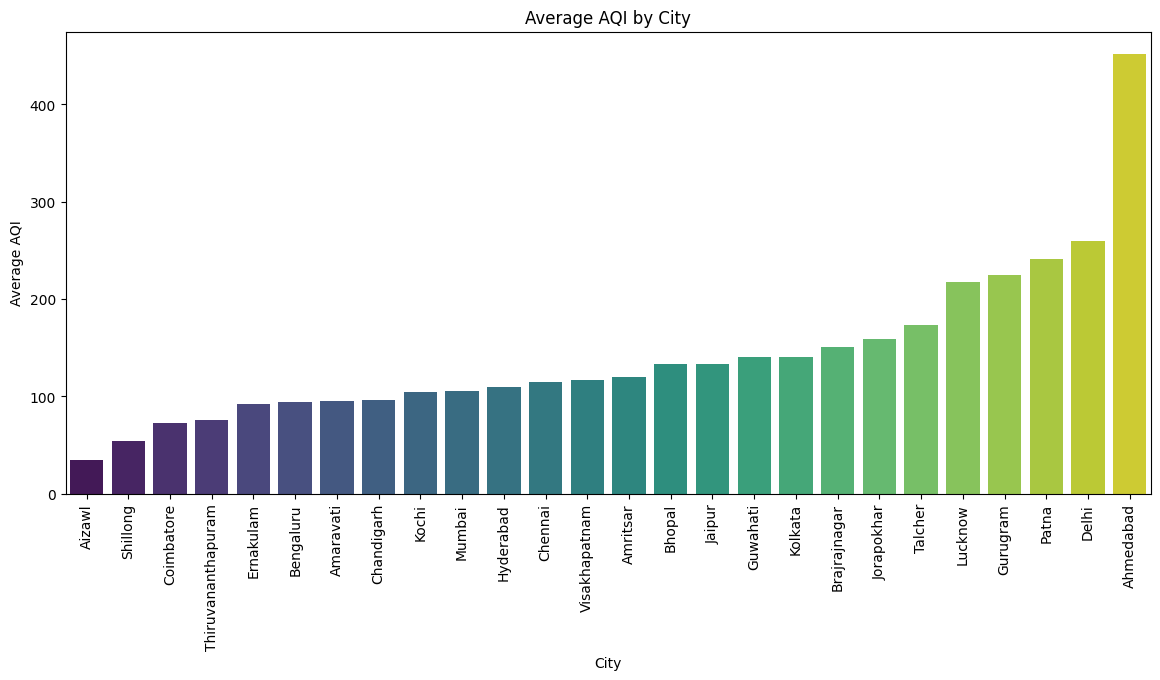

In [6]:
plt.figure(figsize=(14, 6))
city_aqi = df2.groupby('City')['AQI'].mean().sort_values()
sns.barplot(x=city_aqi.index, y=city_aqi.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average AQI by City')
plt.ylabel('Average AQI')
plt.show()

In [7]:
df2 = df2.drop(["AQI_Bucket",'City'], axis=1)

In [8]:
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%m-%d')
df2['Year'] = df2['Date'].dt.year

In [9]:
df2.isnull().sum()

Date           0
PM2.5       4598
PM10       11140
NO          3582
NO2         3585
NOx         4185
NH3        10328
CO          2059
SO2         3854
O3          4022
Benzene     5623
Toluene     8041
Xylene     18109
AQI         4681
Year           0
dtype: int64

In [10]:
df2 = df2.dropna(subset=["AQI"])

In [11]:
df2.isnull().sum()

Date           0
PM2.5        678
PM10        7086
NO           387
NO2          391
NOx         1857
NH3         6536
CO           445
SO2          605
O3           807
Benzene     3535
Toluene     5826
Xylene     15372
AQI            0
Year           0
dtype: int64

In [12]:
df2 = df2.apply(lambda col: col.fillna(col.mean()))

In [13]:
df2.isnull().sum()

Date       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
Year       0
dtype: int64

<Axes: >

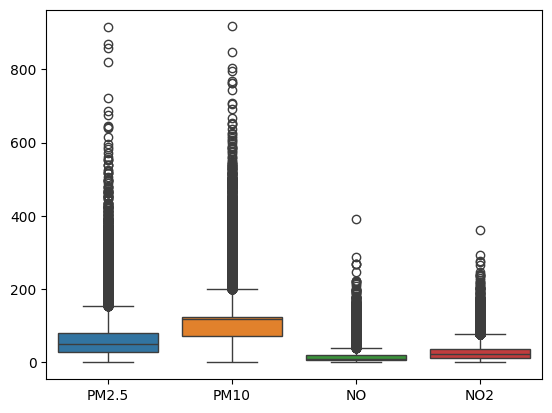

In [14]:
sns.boxplot(data=df2[[ 'PM2.5', 'PM10','NO', 'NO2']])

<Axes: >

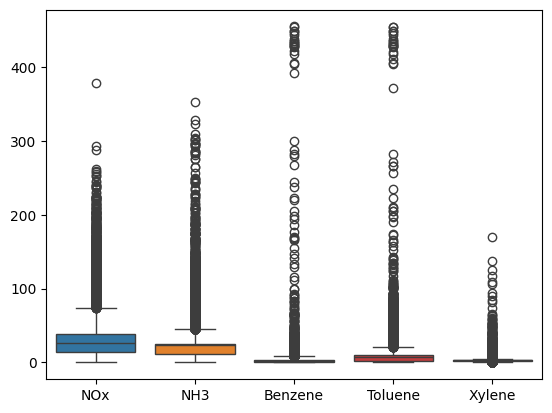

In [15]:
sns.boxplot(data=df2[['NOx','NH3','Benzene', 'Toluene', 'Xylene']]) 

In [16]:
def replace_outliers_with_quartiles(df):
    
    for column in df2.select_dtypes(include=['number']).columns: # Used to cycle through all numeric columns in the DataFrame.
        Q1 = df2[column].quantile(0.25)
        Q3 = df2[column].quantile(0.75)
        IQR = Q3 - Q1
        # To identify outliers, lower and upper limits are calculated and values ​​outside these limits are considered outliers.
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # For each column, we identify outliers and replace them with Q1 or Q3. We do this using a lambda function. If the value is less than the lower bound, it is replaced with Q1. If it is greater than the upper bound, it is replaced with Q3. In the last case, the value is not changed and remains the same.
        df2[column] = df2[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
        )
    
    return df2 

df2 = replace_outliers_with_quartiles(df2)

<Axes: >

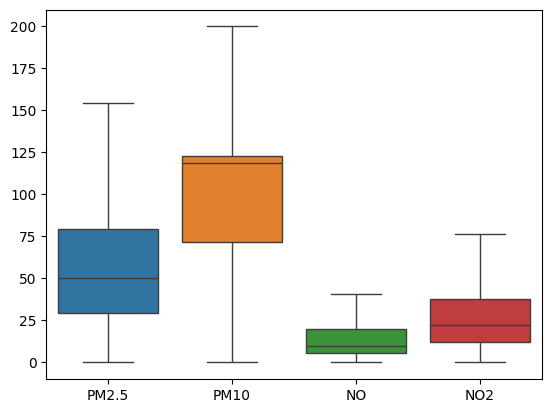

In [17]:
sns.boxplot(data=df2[[ 'PM2.5', 'PM10','NO', 'NO2']])

<Axes: >

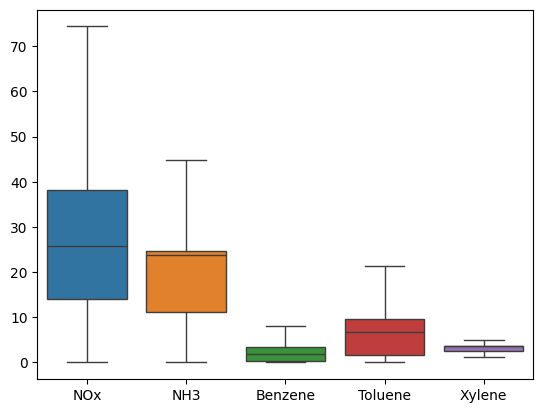

In [18]:
sns.boxplot(data=df2[['NOx','NH3','Benzene', 'Toluene', 'Xylene']]) 

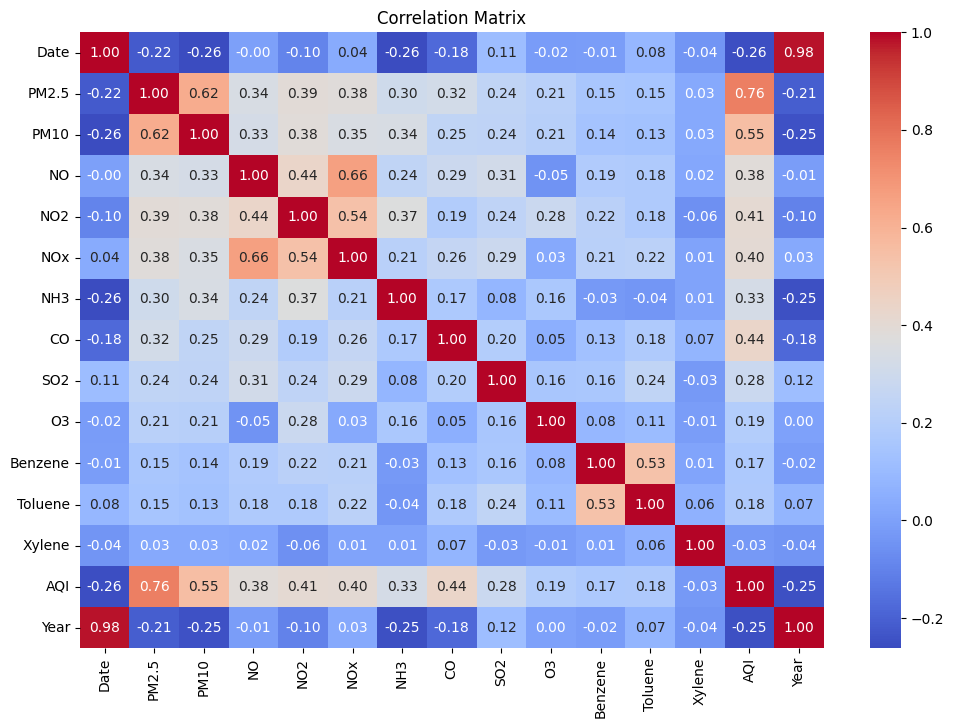

In [19]:
plt.figure(figsize=(12, 8))
corr_matrix = df2.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [20]:
df2

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year
28,2015-01-29,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.020000,0.000000,3.140000,209.0,2015
29,2015-01-30,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.040000,0.000000,4.810000,328.0,2015
30,2015-01-31,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.240000,0.010000,3.588683,208.0,2015
31,2015-02-01,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,14.89,45.3975,0.400000,0.040000,3.588683,208.0,2015
32,2015-02-02,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,14.89,45.3975,0.460000,0.060000,3.588683,208.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,2020-06-27,15.0200,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.3000,2.240000,12.070000,2.650000,41.0,2020
29527,2020-06-28,24.3800,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.1400,0.740000,2.210000,2.650000,70.0,2020
29528,2020-06-29,22.9100,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.9600,0.010000,0.010000,2.650000,68.0,2020
29529,2020-06-30,16.6400,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.3000,0.000000,0.000000,2.650000,54.0,2020


In [21]:
# from sklearn.preprocessing import StandardScaler
# cols_to_scale = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO']

# # Create a StandardScaler object
# scaler = StandardScaler()

# # Fit and transform the scaler on the selected columns
# df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

from sklearn.preprocessing import MinMaxScaler

# Select the columns to be normalized
cols_to_scale = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO','SO2']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the scaler on the selected columns
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [22]:
X = df2[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2']]
y = df2['AQI']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6468099862646541

In [26]:
df2

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year
28,2015-01-29,0.538636,0.593101,0.169742,0.374625,0.453348,0.531632,0.520408,0.521922,59.7600,0.020000,0.000000,3.140000,209.0,2015
29,2015-01-30,0.517308,0.593101,0.339975,0.374233,0.552299,0.531632,0.520408,0.521922,45.3975,0.040000,0.000000,4.810000,328.0,2015
30,2015-01-31,0.612472,0.593101,0.599262,0.426185,0.707314,0.531632,0.520408,0.521922,45.3975,0.240000,0.010000,3.588683,208.0,2015
31,2015-02-01,0.881304,0.593101,0.484133,0.549145,0.513176,0.531632,0.520408,0.521922,45.3975,0.400000,0.040000,3.588683,208.0,2015
32,2015-02-02,0.515153,0.593101,0.484133,0.460775,0.978758,0.531632,0.520408,0.521922,45.3975,0.460000,0.060000,3.588683,208.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,2020-06-27,0.097109,0.254971,0.188192,0.326981,0.262705,0.277877,0.159864,0.299544,23.3000,2.240000,12.070000,2.650000,41.0,2020
29527,2020-06-28,0.157786,0.370912,0.083395,0.340034,0.222237,0.267172,0.176871,0.445808,30.1400,0.740000,2.210000,2.650000,70.0,2020
29528,2020-06-29,0.148256,0.329043,0.084133,0.385328,0.246437,0.238626,0.163265,0.294984,30.9600,0.010000,0.010000,2.650000,68.0,2020
29529,2020-06-30,0.107611,0.250113,0.098893,0.381804,0.252756,0.223461,0.176871,0.344791,28.3000,0.000000,0.000000,2.650000,54.0,2020


In [27]:
from sklearn.linear_model import Ridge, Lasso, SGDRegressor
ridge = Ridge()

In [28]:
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)

In [29]:
r2_score(y_test, y_pred)

0.6468326090523088

In [30]:
lasso = Lasso()

In [31]:
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)

In [32]:
r2_score(y_test, y_pred)

0.640320435892267

In [33]:
from sklearn.svm import SVR
svr = SVR(kernel='')

In [34]:
# svr.fit(X_train,y_train)
# y_pred = svr.predict(X_test)

In [35]:
r2_score(y_test, y_pred)

0.640320435892267

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

In [37]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [38]:
r2_score(y_test, y_pred)

0.8362626895678645

In [39]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=42)

In [40]:
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

In [41]:
r2_score(y_test, y_pred)

0.6852739954435604

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)

In [43]:
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)

In [44]:
r2_score(y_test, y_pred)

0.8135003399353828

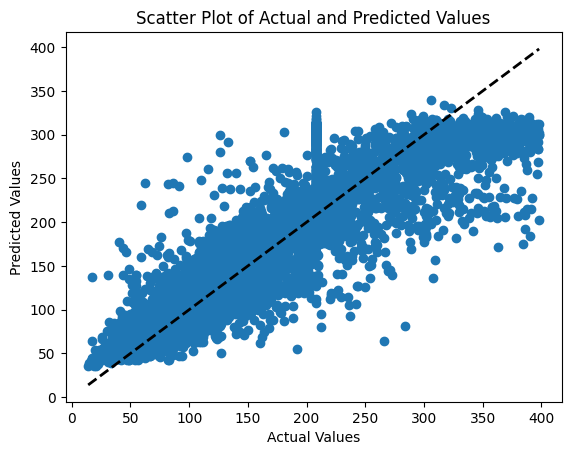

In [45]:
def plot_actual_predict_graph(test_target,test_preds):
    # Scatter plot
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Scatter Plot of Actual and Predicted Values')
    plt.show()

plot_actual_predict_graph(y_test,y_pred)

In [46]:
results = []
#we created a dict where we create objects from different models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso' : Lasso(),
    'DecisionTreeRegressor' : DecisionTreeRegressor(random_state=42),
    'RandomForestRegressor' : RandomForestRegressor(random_state=42, n_jobs=-1),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42)
}

In [47]:
from sklearn.metrics import *
def try_model(model,name):
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds=model.predict(X_test)
    
    # The R^2 score indicates how well the model predicted. A value close to 1 indicates that the model predicted perfectly.
    train_r2_score = r2_score(y_train, train_preds) 
    test_r2_score = r2_score(y_test, test_preds)
    mae = mean_absolute_error(y_test, test_preds)
    rmse = np.sqrt(mean_squared_error(y_test, test_preds))

    print(f"{name} Model:")
    print("Train r2_score : ", train_r2_score)
    print("Test r2_score : ", test_r2_score)
    print("MAE : ", mae)
    print("RMSE : ", rmse)
    print("-" * 40)
    # We add the name of each model and the scores of that model to the result list.
    results.append({'Model': name, 'Train R2 Score': train_r2_score, 'Test R2 Score': test_r2_score})

In [48]:
# Train and test each model
for name, model in models.items():
    try_model(model,name)

LinearRegression Model:
Train r2_score :  0.6486100184095192
Test r2_score :  0.6468099862646541
MAE :  35.77265802453821
RMSE :  51.66933287471753
----------------------------------------
Ridge Model:
Train r2_score :  0.6486090598230614
Test r2_score :  0.6468326090523088
MAE :  35.77280060986223
RMSE :  51.667678067080146
----------------------------------------
Lasso Model:
Train r2_score :  0.6405436847585098
Test r2_score :  0.640320435892267
MAE :  35.34470695785984
RMSE :  52.14186105606827
----------------------------------------
DecisionTreeRegressor Model:
Train r2_score :  0.9987333404130364
Test r2_score :  0.6852739954435604
MAE :  30.27373766407972
RMSE :  48.77473973068157
----------------------------------------
RandomForestRegressor Model:
Train r2_score :  0.9759055512936151
Test r2_score :  0.8362626895678645
MAE :  22.647882776870073
RMSE :  35.180537670513104
----------------------------------------
GradientBoostingRegressor Model:
Train r2_score :  0.824482862592

In [50]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=gbr, 
    param_distributions=param_grid, 
    n_iter=10,  # Number of parameter settings sampled
    cv=5, 
    n_jobs=-1, 
    verbose=2, 
    scoring='r2'
)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation R2 score: {best_score}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.05}
Best cross-validation R2 score: 0.8337004055155829


In [53]:
gbregressor = GradientBoostingRegressor(subsample = 0.8, 
                                        n_estimators = 300, 
                                        min_samples_split = 10, 
                                        min_samples_leaf = 2, 
                                        max_depth = 5, 
                                        learning_rate = 0.05)

In [54]:
gbregressor.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_leaf=2,
                          min_samples_split=10, n_estimators=300,
                          subsample=0.8)

In [55]:
y_pred = gbregressor.predict(X_test)

In [58]:
train_preds = gbregressor.predict(X_train)
test_preds = gbregressor.predict(X_test)
train_r2_score = r2_score(y_train, train_preds) 
test_r2_score = r2_score(y_test, test_preds)
mae = mean_absolute_error(y_test, test_preds)
rmse = np.sqrt(mean_squared_error(y_test, test_preds))
print("Train r2_score : ", train_r2_score)
print("Test r2_score : ", test_r2_score)
print("MAE : ", mae)
print("RMSE : ", rmse)

Train r2_score :  0.875415055309246
Test r2_score :  0.835144857171815
MAE :  23.671863425922847
RMSE :  35.300421933088835
